# Battle of Neighbourhoods

### Importing and installing the required libraries

In [1]:
import pandas as pd
from bs4 import BeautifulSoup
import requests
!pip install folium
!pip install geopy 
from geopy.geocoders import Nominatim 
import folium
import numpy as np
from sklearn.cluster import KMeans



You are using pip version 9.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


You are using pip version 9.0.1, however version 19.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [2]:
res = requests.get("https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M")
soup = BeautifulSoup(res.content,'lxml')
table = soup.find_all('table')[0] 
df = pd.read_html(str(table))

In [3]:
df[0]

,0,1,2
0,Postcode,Borough,Neighbourhood
1,M1A,Not assigned,Not assigned
2,M2A,Not assigned,Not assigned
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,Harbourfront
6,M6A,North York,Lawrence Heights
7,M6A,North York,Lawrence Manor
8,M7A,Queen's Park,Not assigned
9,M8A,Not assigned,Not assigned


In [4]:
df[0].columns=['Postal Code','Borough','Neighbourhood']

In [5]:
data= df[0].drop(df[0].index[0])

In [6]:
data

,Postal Code,Borough,Neighbourhood
1,M1A,Not assigned,Not assigned
2,M2A,Not assigned,Not assigned
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,Harbourfront
6,M6A,North York,Lawrence Heights
7,M6A,North York,Lawrence Manor
8,M7A,Queen's Park,Not assigned
9,M8A,Not assigned,Not assigned
10,M9A,Queen's Park,Queen's Park


In [7]:
data_new = data[data.Borough !='Not assigned']


In [8]:
data_new

,Postal Code,Borough,Neighbourhood
3,M3A,North York,Parkwoods
4,M4A,North York,Victoria Village
5,M5A,Downtown Toronto,Harbourfront
6,M6A,North York,Lawrence Heights
7,M6A,North York,Lawrence Manor
8,M7A,Queen's Park,Not assigned
10,M9A,Queen's Park,Queen's Park
11,M1B,Scarborough,Rouge
12,M1B,Scarborough,Malvern
14,M3B,North York,Don Mills North


In [9]:
data_expected = data_new.groupby(['Postal Code','Borough'])['Neighbourhood'].apply(', '.join).reset_index()


In [10]:
data_expected

,Postal Code,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


In [11]:
data_expected[data_expected.Neighbourhood =='Not assigned']


,Postal Code,Borough,Neighbourhood
85,M7A,Queen's Park,Not assigned


In [12]:
data_expected.loc[data_expected['Neighbourhood'] == 'Not assigned', 'Neighbourhood'] = data_expected['Borough']


In [13]:
data_expected

,Postal Code,Borough,Neighbourhood
0,M1B,Scarborough,"Rouge, Malvern"
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union"
2,M1E,Scarborough,"Guildwood, Morningside, West Hill"
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park"
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge"
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West"
9,M1N,Scarborough,"Birch Cliff, Cliffside West"


### In this assignment, used the beautiful soap API to extract the table data from the url of wikipedia.  Created the 3 column names Postcode,  Borough , Neighbourhood as mentioned in the question. Removed the rows where the Borough is not assigned. Then Grouped the data according to the Postcode, Borough and joined the neighbour hoods seperated by a comma. Then set the neighbourhood to the Borough for the rows where neighbourhood is not assigned

In [14]:
data_expected.shape

(103, 3)

In [15]:
import pandas as pd
geospacial_data= pd.read_csv('http://cocl.us/Geospatial_data')

In [16]:
geospacial_data

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476
5,M1J,43.744734,-79.239476
6,M1K,43.727929,-79.262029
7,M1L,43.711112,-79.284577
8,M1M,43.716316,-79.239476
9,M1N,43.692657,-79.264848


In [17]:
merged_data= (pd.merge(data_expected,geospacial_data, on='Postal Code'))

In [18]:
merged_data

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


In [19]:
Toronto_data= merged_data[merged_data['Borough'].str.contains('Toronto')]

In [20]:
Toronto_data

,Postal Code,Borough,Neighbourhood,Latitude,Longitude
37,M4E,East Toronto,The Beaches,43.676357,-79.293031
41,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188
42,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572
43,M4M,East Toronto,Studio District,43.659526,-79.340923
44,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790
45,M4P,Central Toronto,Davisville North,43.712751,-79.390197
46,M4R,Central Toronto,North Toronto West,43.715383,-79.405678
47,M4S,Central Toronto,Davisville,43.704324,-79.388790
48,M4T,Central Toronto,"Moore Park, Summerhill East",43.689574,-79.383160
49,M4V,Central Toronto,"Deer Park, Forest Hill SE, Rathnelly, South Hi...",43.686412,-79.400049


In [21]:
Toronto_data.shape

(38, 5)

In [22]:
address = 'Toronto'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.653963, -79.387207.


In [23]:
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(Toronto_data['Latitude'], Toronto_data['Longitude'], Toronto_data['Neighbourhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  

In [24]:
map_toronto

### Filtered the data  with the word Toronto. Got the longitude and latitide of Toronto using geolocator. Created a folium map from the Toronto data

In [25]:
CLIENT_ID = 'NXQUJA24WEL3B2LCND2DET4V0SUVN5KPE33IJYB50NBIR22D' # your Foursquare ID
CLIENT_SECRET = 'JQ1RMZTXKI2SA2JPB2NKFZURXWQJVALQMB1RWXGPGRRALJAQ' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: NXQUJA24WEL3B2LCND2DET4V0SUVN5KPE33IJYB50NBIR22D
CLIENT_SECRET:JQ1RMZTXKI2SA2JPB2NKFZURXWQJVALQMB1RWXGPGRRALJAQ


In [26]:
def getNearbyVenues(names, latitudes, longitudes):
    radius=500
    LIMIT=100
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
        
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)

        results = requests.get(url).json()["response"]['groups'][0]['items']
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighbourhood', 
                  'Neighbourhood Latitude', 
                  'Neighbourhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)
toronto_venues = getNearbyVenues(names=Toronto_data['Neighbourhood'],
                                   latitudes=Toronto_data['Latitude'],
                                   longitudes=Toronto_data['Longitude']
                                  )
                             

The Beaches
The Danforth West, Riverdale
The Beaches West, India Bazaar
Studio District
Lawrence Park
Davisville North
North Toronto West
Davisville
Moore Park, Summerhill East
Deer Park, Forest Hill SE, Rathnelly, South Hill, Summerhill West
Rosedale
Cabbagetown, St. James Town
Church and Wellesley
Harbourfront
Ryerson, Garden District
St. James Town
Berczy Park
Central Bay Street
Adelaide, King, Richmond
Harbourfront East, Toronto Islands, Union Station
Design Exchange, Toronto Dominion Centre
Commerce Court, Victoria Hotel
Roselawn
Forest Hill North, Forest Hill West
The Annex, North Midtown, Yorkville
Harbord, University of Toronto
Chinatown, Grange Park, Kensington Market
CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara
Stn A PO Boxes 25 The Esplanade
First Canadian Place, Underground city
Christie
Dovercourt Village, Dufferin
Little Portugal, Trinity
Brockton, Exhibition Place, Parkdale Village
High Park, The Junction Sout

In [35]:
Toronto_data.loc[63,'Neighbourhood']

'Roselawn'

In [36]:
neighborhood_latitude = Toronto_data.loc[63, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = Toronto_data.loc[63, 'Longitude'] # neighborhood longitude value

neighborhood_name = Toronto_data.loc[63, 'Neighbourhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Roselawn are 43.7116948, -79.41693559999999.


In [37]:

LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

# create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    LIMIT)

results = requests.get(url).json()

In [38]:
from pandas.io.json import json_normalize
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']
    
# Call the function
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues

,name,categories,lat,lng
0,Rosalind's Garden Oasis,Garden,43.712189,-79.411978


In [39]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))


1 venues were returned by Foursquare.


In [40]:
toronto_venues.head()

,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,The Beaches,43.676357,-79.293031,Glen Manor Ravine,43.676821,-79.293942,Trail
1,The Beaches,43.676357,-79.293031,The Big Carrot Natural Food Market,43.678879,-79.297734,Health Food Store
2,The Beaches,43.676357,-79.293031,Grover Pub and Grub,43.679181,-79.297215,Pub
3,The Beaches,43.676357,-79.293031,Upper Beaches,43.680563,-79.292869,Neighborhood
4,"The Danforth West, Riverdale",43.679557,-79.352188,Pantheon,43.677621,-79.351434,Greek Restaurant


In [41]:
venues_count= toronto_venues.groupby('Neighbourhood').count()


In [42]:
venues_count



,Neighbourhood Latitude,Neighbourhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighbourhood,,,,,,
"Adelaide, King, Richmond",100,100,100,100,100,100
Berczy Park,58,58,58,58,58,58
"Brockton, Exhibition Place, Parkdale Village",22,22,22,22,22,22
Business Reply Mail Processing Centre 969 Eastern,18,18,18,18,18,18
"CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara",16,16,16,16,16,16
"Cabbagetown, St. James Town",44,44,44,44,44,44
Central Bay Street,83,83,83,83,83,83
"Chinatown, Grange Park, Kensington Market",95,95,95,95,95,95
Christie,17,17,17,17,17,17


In [43]:
venues_count.drop(['Neighbourhood Latitude', 'Neighbourhood Longitude','Venue','Venue Latitude','Venue Longitude' ], axis=1,inplace=True)

In [44]:
venues_count.columns=['Venues_count']

In [45]:
venues_count.columns

Index(['Venues_count'], dtype='object')

In [46]:
venues_count

,Venues_count
Neighbourhood,
"Adelaide, King, Richmond",100
Berczy Park,58
"Brockton, Exhibition Place, Parkdale Village",22
Business Reply Mail Processing Centre 969 Eastern,18
"CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara",16
"Cabbagetown, St. James Town",44
Central Bay Street,83
"Chinatown, Grange Park, Kensington Market",95
Christie,17


In [47]:
print('There are {} uniques categories.'.format(len(toronto_venues['Venue Category'].unique())))

There are 230 uniques categories.


### one hot encoding 

In [48]:
# one hot encoding
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighbourhood'] = toronto_venues['Neighbourhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]

toronto_onehot.head()

,Neighbourhood,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,The Beaches,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,The Beaches,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"The Danforth West, Riverdale",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
toronto_onehot.shape

(1698, 231)

### Grouping the one hot encoded data according to the mean

In [51]:
toronto_grouped = toronto_onehot.groupby('Neighbourhood').mean().reset_index()
toronto_grouped

,Neighbourhood,Afghan Restaurant,Airport,Airport Food Court,Airport Gate,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,...,Toy / Game Store,Trail,Train Station,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,"Adelaide, King, Richmond",0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.030000,0.000000,...,0.000000,0.00000,0.00,0.020000,0.000000,0.000000,0.010000,0.000000,0.000000,0.000000
1,Berczy Park,0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,0.000000,...,0.000000,0.00000,0.00,0.017241,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,"Brockton, Exhibition Place, Parkdale Village",0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,0.000000,...,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.045455
3,Business Reply Mail Processing Centre 969 Eastern,0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,0.000000,...,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055556
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",0.000000,0.0625,0.0625,0.0625,0.125,0.1875,0.125,0.000000,0.000000,...,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,"Cabbagetown, St. James Town",0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.022727,0.000000,...,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,Central Bay Street,0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.012048,0.000000,...,0.000000,0.00000,0.00,0.012048,0.000000,0.000000,0.012048,0.000000,0.000000,0.012048
7,"Chinatown, Grange Park, Kensington Market",0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,0.000000,...,0.000000,0.00000,0.00,0.031579,0.000000,0.052632,0.010526,0.000000,0.000000,0.000000
8,Christie,0.000000,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.000000,0.000000,...,0.000000,0.00000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Church and Wellesley,0.011765,0.0000,0.0000,0.0000,0.000,0.0000,0.000,0.011765,0.000000,...,0.000000,0.00000,0.00,0.000000,0.000000,0.011765,0.000000,0.011765,0.011765,0.011765


### Findng out top 5 menues of each location

In [52]:
num_top_venues = 5

for hood in toronto_grouped['Neighbourhood']:
    print("----"+hood+"----")
    temp = toronto_grouped[toronto_grouped['Neighbourhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Adelaide, King, Richmond----
             venue  freq
0      Coffee Shop  0.07
1             Café  0.05
2       Steakhouse  0.04
3              Bar  0.04
4  Thai Restaurant  0.04


----Berczy Park----
                venue  freq
0         Coffee Shop  0.09
1              Bakery  0.05
2  Seafood Restaurant  0.03
3        Cocktail Bar  0.03
4      Farmers Market  0.03


----Brockton, Exhibition Place, Parkdale Village----
                    venue  freq
0          Breakfast Spot  0.09
1             Coffee Shop  0.09
2                    Café  0.09
3             Yoga Studio  0.05
4  Furniture / Home Store  0.05


----Business Reply Mail Processing Centre 969 Eastern----
                venue  freq
0  Light Rail Station  0.11
1         Yoga Studio  0.06
2                 Spa  0.06
3       Garden Center  0.06
4              Garden  0.06


----CN Tower, Bathurst Quay, Island airport, Harbourfront West, King and Spadina, Railway Lands, South Niagara----
              venue  freq
0   Airpo

In [53]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

### printing the top 5 menues in each neighbour hood in a data set

In [54]:
import numpy as np
num_top_venues = 5

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighbourhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighbourhood'] = toronto_grouped['Neighbourhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighbourhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
0,"Adelaide, King, Richmond",Coffee Shop,Café,Steakhouse,Thai Restaurant,Bar
1,Berczy Park,Coffee Shop,Bakery,Cocktail Bar,Beer Bar,Steakhouse
2,"Brockton, Exhibition Place, Parkdale Village",Breakfast Spot,Café,Coffee Shop,Yoga Studio,Bakery
3,Business Reply Mail Processing Centre 969 Eastern,Light Rail Station,Yoga Studio,Auto Workshop,Garden Center,Garden
4,"CN Tower, Bathurst Quay, Island airport, Harbo...",Airport Service,Airport Lounge,Airport Terminal,Plane,Bar


In [55]:
from sklearn.cluster import KMeans

toronto_grouped_clustering = toronto_grouped.drop('Neighbourhood', 1)

Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(toronto_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)

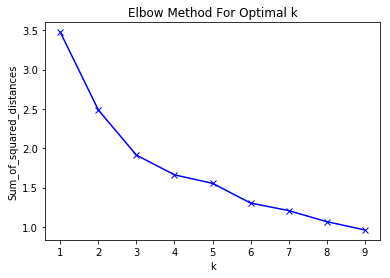

In [56]:
import matplotlib.pyplot as plt
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

## Forming 5 clusters using k means  with k =5

In [57]:
# set number of clusters
from sklearn.cluster import KMeans

kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighbourhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Creating 5 cluster labels and printing them in a dataset 

In [58]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

toronto_merged = Toronto_data

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged = toronto_merged.join(neighborhoods_venues_sorted.set_index('Neighbourhood'), on='Neighbourhood')

toronto_merged.head() 

,Postal Code,Borough,Neighbourhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
37,M4E,East Toronto,The Beaches,43.676357,-79.293031,4,Trail,Health Food Store,Pub,Neighborhood,Ethiopian Restaurant
41,M4K,East Toronto,"The Danforth West, Riverdale",43.679557,-79.352188,0,Greek Restaurant,Coffee Shop,Ice Cream Shop,Italian Restaurant,Furniture / Home Store
42,M4L,East Toronto,"The Beaches West, India Bazaar",43.668999,-79.315572,0,Park,Sandwich Place,Steakhouse,Sushi Restaurant,Food & Drink Shop
43,M4M,East Toronto,Studio District,43.659526,-79.340923,0,Café,Coffee Shop,Bakery,Italian Restaurant,American Restaurant
44,M4N,Central Toronto,Lawrence Park,43.728020,-79.388790,3,Park,Swim School,Bus Line,Yoga Studio,Diner


### Visualizing the clusters using folium map

In [59]:
# create map
import matplotlib.cm as cm
import matplotlib.colors as colors
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighbourhood'], toronto_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [60]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
41,East Toronto,0,Greek Restaurant,Coffee Shop,Ice Cream Shop,Italian Restaurant,Furniture / Home Store
42,East Toronto,0,Park,Sandwich Place,Steakhouse,Sushi Restaurant,Food & Drink Shop
43,East Toronto,0,Café,Coffee Shop,Bakery,Italian Restaurant,American Restaurant
45,Central Toronto,0,Gym,Clothing Store,Food & Drink Shop,Sandwich Place,Breakfast Spot
46,Central Toronto,0,Clothing Store,Coffee Shop,Sporting Goods Shop,Yoga Studio,Mexican Restaurant
47,Central Toronto,0,Pizza Place,Sandwich Place,Dessert Shop,Gym,Coffee Shop
49,Central Toronto,0,Coffee Shop,Pub,Restaurant,Fried Chicken Joint,Light Rail Station
51,Downtown Toronto,0,Restaurant,Coffee Shop,Bakery,Pub,Pizza Place
52,Downtown Toronto,0,Coffee Shop,Japanese Restaurant,Sushi Restaurant,Gay Bar,Restaurant
53,Downtown Toronto,0,Coffee Shop,Park,Bakery,Pub,Café


In [61]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
63,Central Toronto,1,Garden,Yoga Studio,Farmers Market,Falafel Restaurant,Event Space


In [62]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
48,Central Toronto,2,Playground,Tennis Court,Park,Restaurant,Yoga Studio
50,Downtown Toronto,2,Park,Playground,Trail,Yoga Studio,Dessert Shop


In [63]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
44,Central Toronto,3,Park,Swim School,Bus Line,Yoga Studio,Diner


In [64]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Borough,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue
37,East Toronto,4,Trail,Health Food Store,Pub,Neighborhood,Ethiopian Restaurant
